<center>
<h1 style="color:red; font-size:70px;"> Transfer Learning</h1>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from tensorflow.keras.models import Model

2025-09-08 18:12:56.797438: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 18:12:56.844038: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 18:12:56.973355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757347977.180491  226624 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757347977.259987  226624 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757347977.438856  226624 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## Immagini con interpolazione

In [2]:
trDat = tf.keras.utils.image_dataset_from_directory(
    "../Dataset/train",
    shuffle = True,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (128, 128),
    batch_size = 64,
    color_mode = "rgb",
    label_mode = "int"
)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


2025-09-08 18:13:30.665760: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


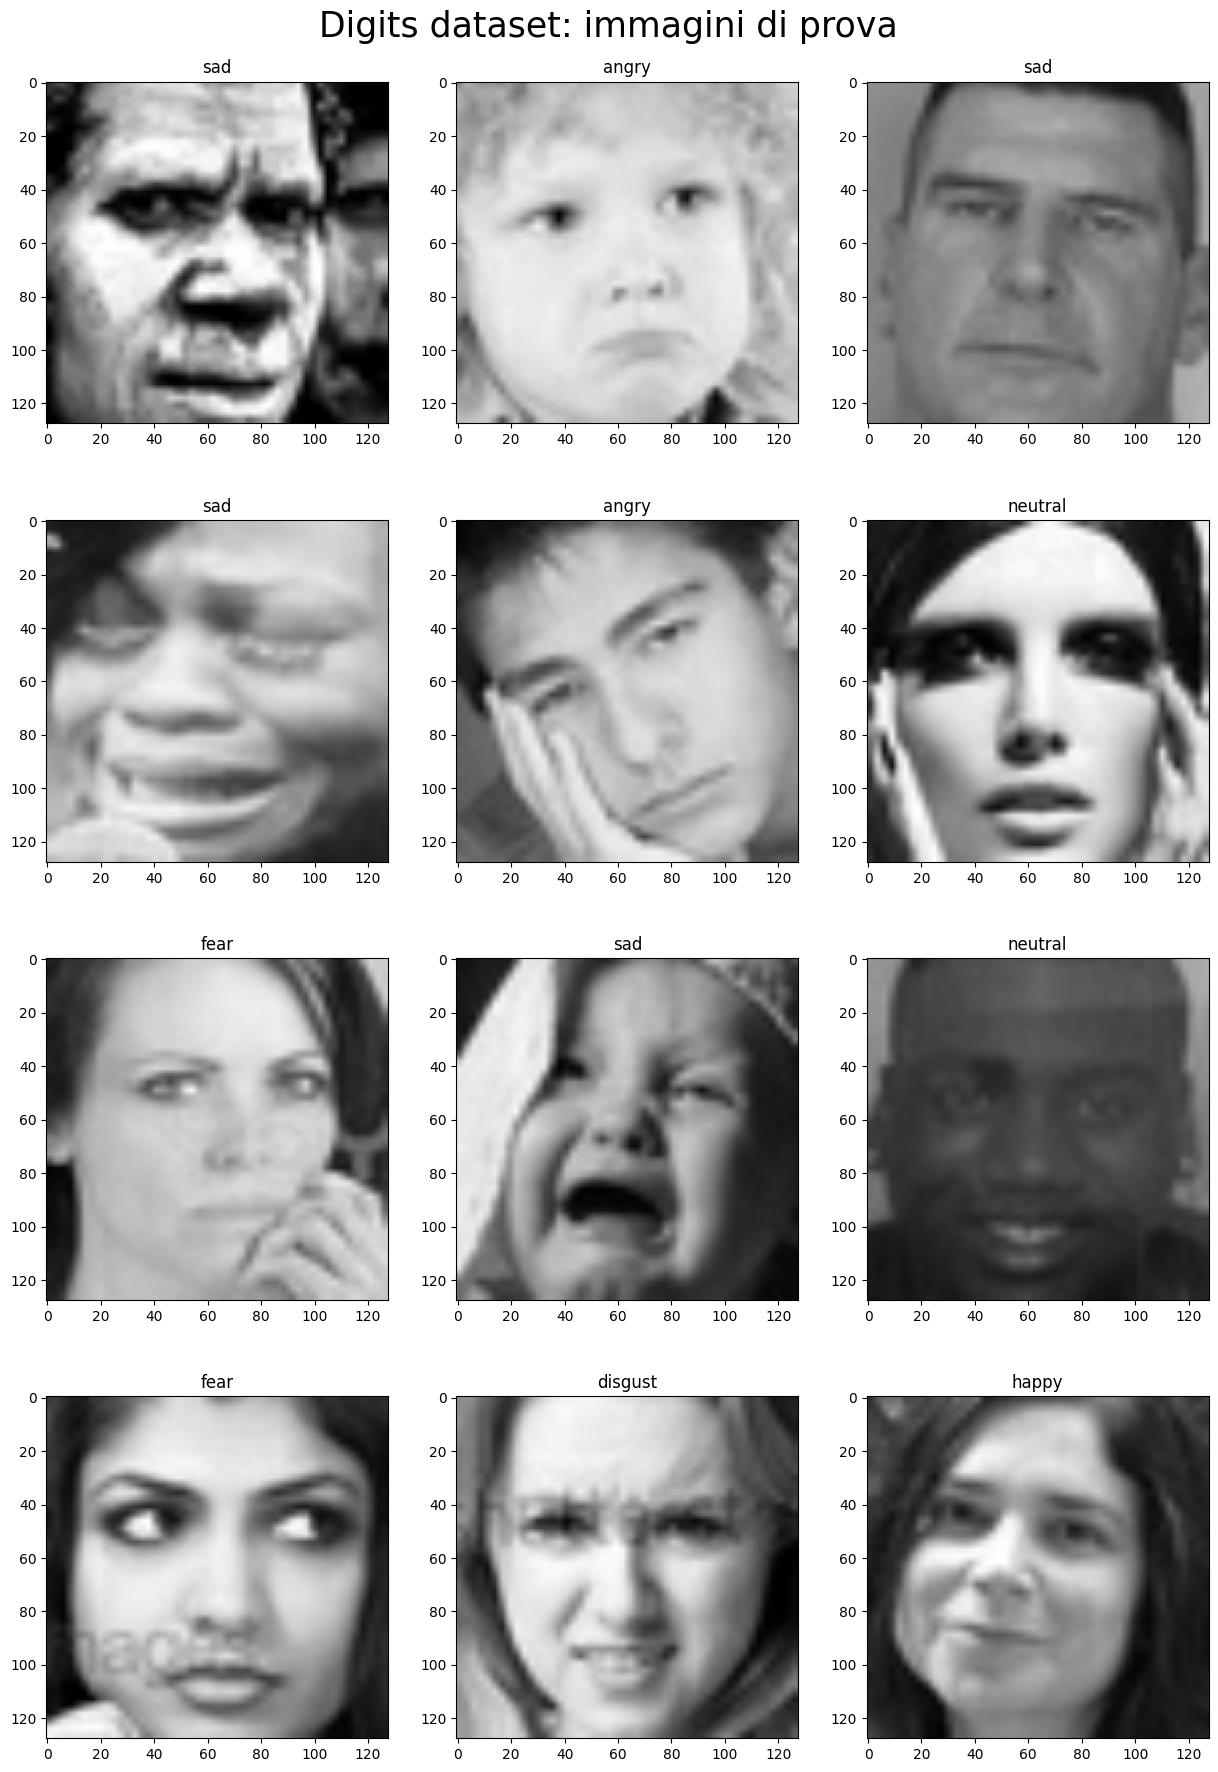

2025-09-08 18:13:37.510393: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
def studyDat(img, lab, classes):
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(img[5*i+j]/255.)
            ax[i][j].set_title(classes[lab[5*i+j]])

    fig.suptitle("Digits dataset: immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for img, lab in trDat.take(1):
    studyDat(img, lab, cls)

## Test accuracy

In [4]:
testDat = tf.keras.utils.image_dataset_from_directory(
    "../Dataset/test",
    shuffle = True,
    seed = 123,
    image_size = (128, 128),
    batch_size = 64,
    color_mode = "rgb",
    label_mode = "int"
)

Found 7178 files belonging to 7 classes.


In [5]:
names = np.array(["mod/V1.keras", "mod/FT10.keras", "mod/FT20.keras", "mod/FT30.keras", "mod/FT40.keras", "mod/FT50.keras", "mod/FT60.keras"])
defreez = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

accM = []
for name in names:
    # Carico il modello
    print("Carico il modello: " + name.split("/")[-1])
    model = tf.keras.models.load_model(name)


    # Tolgo data augmentation
    print("Tolgo data augmentation: " + name.split("/")[-1])
    x = model.input

    y = x
    for i, layer in enumerate(model.layers[1:], start=1):  # parti dal layer 1
        if i == 1:   # questo è il secondo layer, lo saltiamo
            continue
        y = layer(y)

    newM = Model(inputs=model.input, outputs=y)
    newM.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


    # Valuto performance
    print("Valuto performance modello: " + name.split("/")[-1])
    l, a = newM.evaluate(testDat)
    accM.append(a)
    print("\n")

Carico il modello: V1.keras
Tolgo data augmentation: V1.keras
Valuto performance modello: V1.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.4276 - loss: 1.4626


Carico il modello: FT10.keras
Tolgo data augmentation: FT10.keras
Valuto performance modello: FT10.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 105s 885ms/step - accuracy: 0.5449 - loss: 1.2018


Carico il modello: FT20.keras
Tolgo data augmentation: FT20.keras
Valuto performance modello: FT20.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 539ms/step - accuracy: 0.5911 - loss: 1.1482


Carico il modello: FT30.keras
Tolgo data augmentation: FT30.keras
Valuto performance modello: FT30.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 548ms/step - accuracy: 0.6335 - loss: 1.4378


Carico il modello: FT40.keras
Tolgo data augmentation: FT40.keras
Valuto performance modello: FT40.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 116s 904ms/step - accuracy: 0.6361 - loss: 1.2505


Carico il modello: FT50.keras
Tolgo data augmentation: FT50.keras
Valuto performa

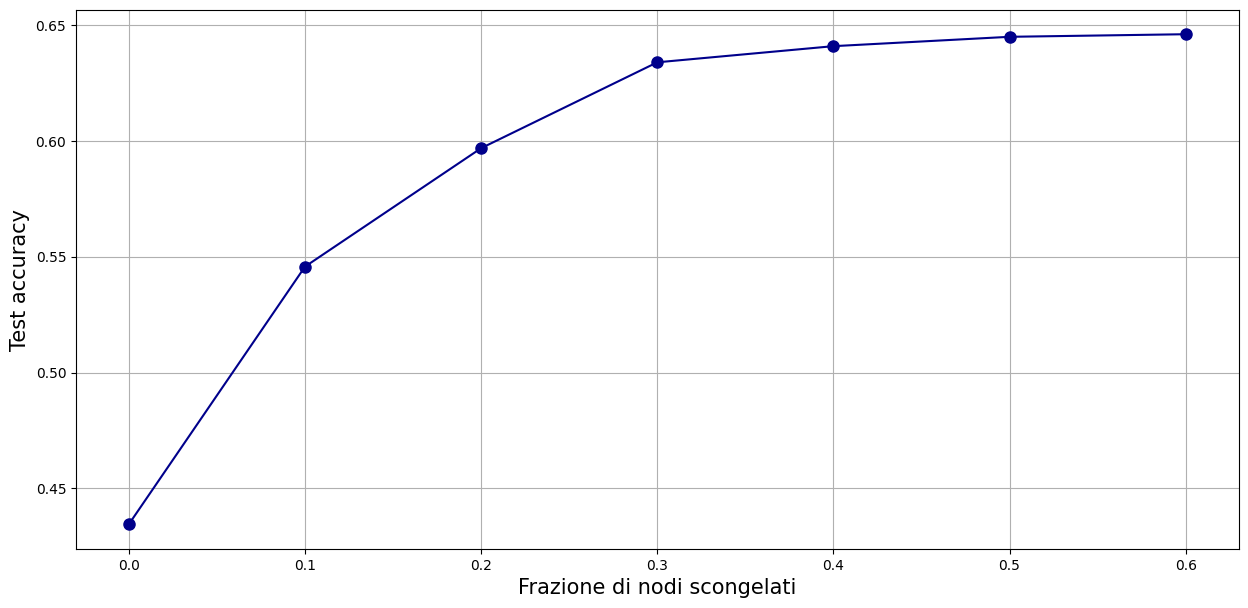

In [7]:
fig = plt.figure(figsize = (15, 7))
plt.plot(defreez, accM, color = "darkblue", marker="o", markersize = 8)
plt.xlabel("Frazione di nodi scongelati", fontsize = 15)
plt.ylabel("Test accuracy", fontsize = 15)
plt.grid(True)
plt.show()

## Effetto interpolazione

In [21]:
tr1 = tf.keras.utils.image_dataset_from_directory(
    "../Dataset/train",
    shuffle = True,
    validation_split = 0.99,
    subset = "training",
    seed = 123,
    image_size = (48, 48),
    batch_size = 64,
    color_mode = "rgb",
    label_mode = "int"
)

tr2 = tf.keras.utils.image_dataset_from_directory(
    "../Dataset/train",
    shuffle = True,
    validation_split = 0.99,
    subset = "training",
    seed = 123,
    image_size = (128, 128),
    batch_size = 64,
    color_mode = "rgb",
    label_mode = "int"
)

img1, lab1 = next(iter(tr1))
img2, lab2 = next(iter(tr2))

Found 28709 files belonging to 7 classes.
Using 288 files for training.
Found 28709 files belonging to 7 classes.
Using 288 files for training.


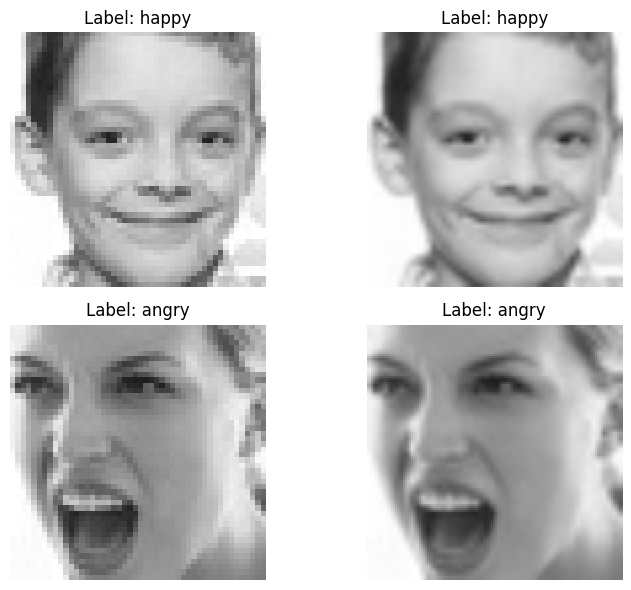

In [23]:
plt.figure(figsize=(8, 6))
cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for i in range(2):
    plt.subplot(2, 2, 2*i+1)
    plt.imshow(img1[5*i+5].numpy().astype("uint8"))
    plt.title(f"Label: " + cls[lab1[5*i+5].numpy()])
    plt.axis("off")

    plt.subplot(2, 2, 2*(i+1))
    plt.imshow(img2[5*i+5].numpy().astype("uint8"))
    plt.title(f"Label: " + cls[lab2[5*i+5].numpy()])
    plt.axis("off")

plt.tight_layout()
plt.show()